In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

In [2]:
# Параметры для запуска программы на C#
initial_age_file = "/Users/nikitavolnuhin/Labs_cs/lab6/InitialAge.csv"
death_rules_file = "/Users/nikitavolnuhin/Labs_cs/lab6/DeathRules.csv"
result_file = "/Users/nikitavolnuhin/Labs_cs/lab6/SimulationResult.csv"
age_group_file = "/Users/nikitavolnuhin/Labs_cs/lab6/AgeGroupDistribution.csv"  # Путь к файлу с возрастным составом
start_year = 1970
end_year = 2021
total_population = 130000000

# Путь к исполнимому файлу программы на C#
csharp_program_path = "/Users/nikitavolnuhin/Labs_cs/lab6/Demographic.Exec/bin/Release/net8.0/publish/Demographic.Exec"

In [3]:
# Формируем команду для запуска программы на C#
command = [
    csharp_program_path,
    initial_age_file,
    death_rules_file,
    result_file,
    str(start_year),
    str(end_year),
    str(total_population)
]

In [4]:
# Запуск программы на C# с ожиданием завершения и тайм-аутом
try:
    result = subprocess.run(command, capture_output=True, text=True, timeout=300)  # Тайм-аут 300 секунд
    if result.returncode != 0:
        print("Процесс завершился с ошибкой:")
        print(result.stderr)
    else:
        print("Программа на C# завершена успешно.")
except subprocess.TimeoutExpired:
    print("Программа на C# превысила лимит времени выполнения.")

Программа на C# завершена успешно.


In [5]:
# Считываем результаты из файла
columns = ['Year', 'TotalPopulation', 'MalePopulation', 'FemalePopulation']
results = pd.read_csv(result_file, names=columns)

# Масштабируем данные (переводим в тысячи)
results['TotalPopulation'] = results['TotalPopulation'] // 1000
results['MalePopulation'] = results['MalePopulation'] // 1000
results['FemalePopulation'] = results['FemalePopulation'] // 1000

# Проверяем, что данные загружаются корректно
print("Данные результатов моделирования:")
print(results.head())



Данные результатов моделирования:
   Year  TotalPopulation  MalePopulation  FemalePopulation
0  1970           129916           64306             65609
1  1971           124191           61053             63138
2  1972           121014           59141             61873
3  1973           118924           57825             61098
4  1974           117611           56933             60677


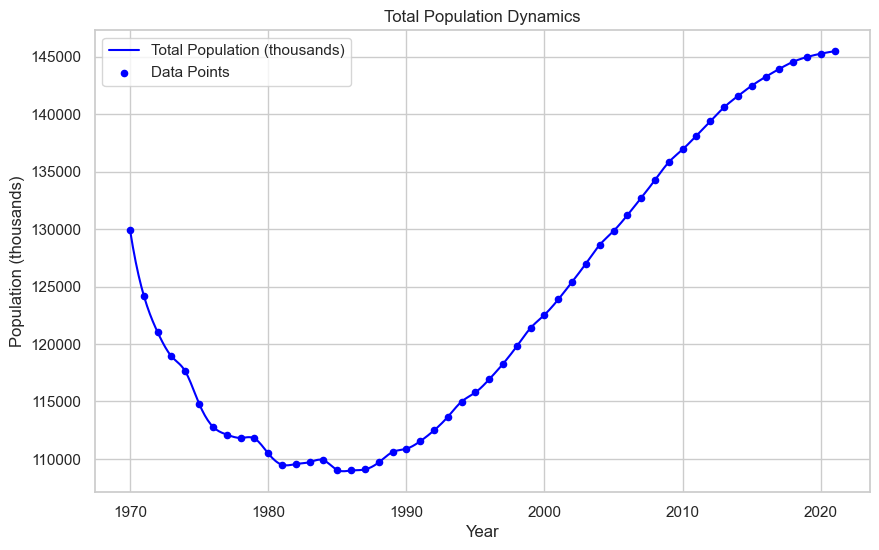

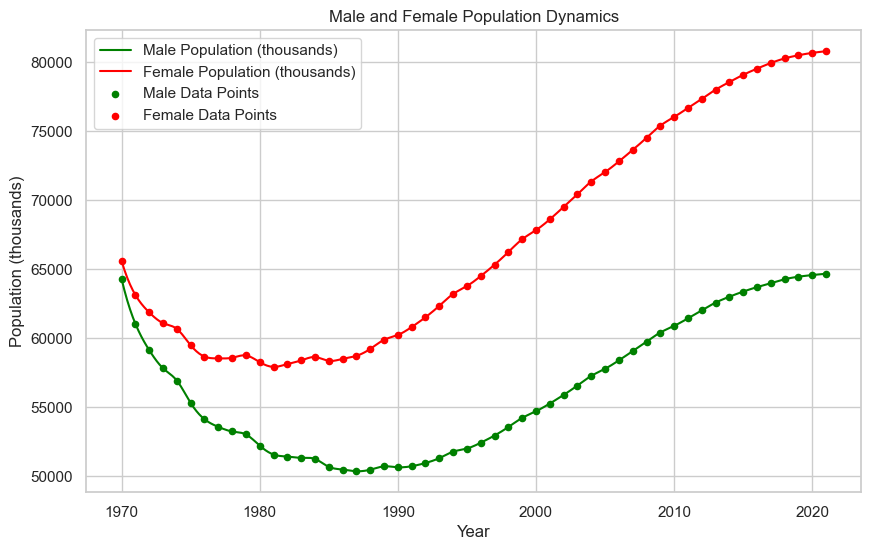

In [6]:
# График изменения населения (spline chart) с точками
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

x = results['Year']
# Общая популяция
y_total = results['TotalPopulation']
spl_total = make_interp_spline(x, y_total, k=3)
x_new = np.linspace(x.min(), x.max(), 500)
y_total_new = spl_total(x_new)
plt.plot(x_new, y_total_new, label='Total Population (thousands)', color='blue')
plt.scatter(x, y_total, color='blue', s=20, label='Data Points')  # Добавляем точки

# Настройки графика
plt.title('Total Population Dynamics')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()
plt.show()

# График изменения мужской и женской популяции по годам с точками
plt.figure(figsize=(10, 6))
spl_male = make_interp_spline(x, results['MalePopulation'], k=3)
spl_female = make_interp_spline(x, results['FemalePopulation'], k=3)
plt.plot(x_new, spl_male(x_new), label='Male Population (thousands)', color='green')
plt.plot(x_new, spl_female(x_new), label='Female Population (thousands)', color='red')
plt.scatter(x, results['MalePopulation'], color='green', s=20, label='Male Data Points')  # Точки для мужчин
plt.scatter(x, results['FemalePopulation'], color='red', s=20, label='Female Data Points')  # Точки для женщин
plt.title('Male and Female Population Dynamics')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()
plt.show()



Данные о возрастных группах:
      Age  Population       Men     Women
0    0-18    74542484  33784239  40758245
1   19-44    64786278  28341156  36445122
2   45-64     6097540   2532936   3564604
3  65-100       47638     15925     31713


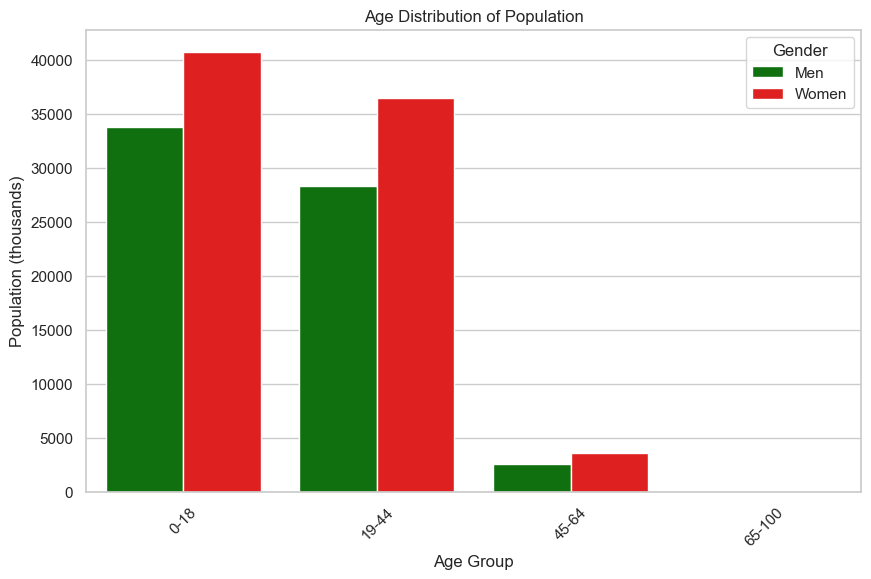

In [9]:
# Читаем данные о возрастных группах
age_group_data = pd.read_csv(age_group_file)

# Проверяем, что данные о возрастных группах загружаются корректно
print("Данные о возрастных группах:")
print(age_group_data.head())

# Масштабируем данные (переводим в тысячи)
age_group_data['Population'] = age_group_data['Population'] // 1000
age_group_data['Men'] = age_group_data['Men'] // 1000
age_group_data['Women'] = age_group_data['Women'] // 1000

# Преобразуем данные для одного графика возрастного состава
age_group_melted = age_group_data.melt(
    id_vars='Age', 
    value_vars=['Men', 'Women'], 
    var_name='Gender', 
    value_name='Pop (thousands)'  # Уникальное имя для нового столбца
)

# График для возрастного состава (Men + Women)
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_melted, x='Age', y='Pop (thousands)', hue='Gender', palette=['green', 'red'])
plt.title('Age Distribution of Population')
plt.xlabel('Age Group')
plt.ylabel('Population (thousands)')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()